# Table of Contents
1) Import Libraries and Data

2) Remove PII (Personally Identifiable Information)

3) Create Region column flag for dataframe and investigate spending differences across Regions

4) Remove low activity users

5) Create customer profiles

6) Create visualizations for customer profile distributions

7) Find descriptive statistics for customer profiles based on usage frequency and expenditure

8/9) Compare customer profiles across regions and departments and provide visualizations

10) Analysis of departments and loyalty

11) Export visualizations and dataframe

In [1]:
#import libraries
import pandas as pd
import numpy as np
import os
import seaborn as se
import matplotlib as mp
import scipy as sc

In [2]:
#define path
path = r'C:\Users\Owner\Documents\Career Foundry\Tasks\Data Immersion Tasks\Instacart Project'

In [3]:
#import customer/orders/products data as df_cust_prod_ord
df_cust_prod_ord = pd.read_pickle(os.path.join(path, '2 Data', 'prepared data', 'final_orders_products_customers.pkl'))

In [4]:
#check shape of dataframe
df_cust_prod_ord.shape

(32435059, 33)

In [5]:
#import department data as df_dept
df_dept = pd.read_csv(os.path.join(path, '2 Data', 'prepared data', 'departments_wrangled.csv'))

## 2)
Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

In [6]:
#review the headers of df_cust_prod_ord to check for any PII
pd.set_option('display.max_columns', None)
df_cust_prod_ord.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range,busiest_day,busiest_2_days,busiest_period_of_day,max_order,loyalty_flag,avg_user_price,spend_flag,median_days_since_order,frequency_flag,first_name,last_name,Gender,STATE,Age,date_joined,num_of_dependants,fam_status,income,_merge
0,2539329.0,1.0,1.0,2.0,8.0,NaN,196,1.0,0.0,Soda,77.0,7.0,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,10.0,New Customer,6.367797,Low Spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,both
1,2398795.0,1.0,2.0,3.0,7.0,15.0,196,1.0,1.0,Soda,77.0,7.0,9.0,Mid-range product,Regularly busy,Least busy,Average orders,10.0,New Customer,6.367797,Low Spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,both
2,473747.0,1.0,3.0,3.0,12.0,21.0,196,1.0,1.0,Soda,77.0,7.0,9.0,Mid-range product,Regularly busy,Least busy,Most orders,10.0,New Customer,6.367797,Low Spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,both
3,2254736.0,1.0,4.0,4.0,7.0,29.0,196,1.0,1.0,Soda,77.0,7.0,9.0,Mid-range product,Least busy,Least busy,Average orders,10.0,New Customer,6.367797,Low Spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,both
4,431534.0,1.0,5.0,4.0,15.0,28.0,196,1.0,1.0,Soda,77.0,7.0,9.0,Mid-range product,Least busy,Least busy,Most orders,10.0,New Customer,6.367797,Low Spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,both


In [7]:
#remove the first name and last name columns to remove PII information. the user_id column can bring this information back if needed in future
df_cust_prod_ord = df_cust_prod_ord.drop(columns =['first_name','last_name'])

In [8]:
#recheck column headers
pd.set_option('display.max_columns', None)
df_cust_prod_ord.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range,busiest_day,busiest_2_days,busiest_period_of_day,max_order,loyalty_flag,avg_user_price,spend_flag,median_days_since_order,frequency_flag,Gender,STATE,Age,date_joined,num_of_dependants,fam_status,income,_merge
0,2539329.0,1.0,1.0,2.0,8.0,NaN,196,1.0,0.0,Soda,77.0,7.0,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,10.0,New Customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,both
1,2398795.0,1.0,2.0,3.0,7.0,15.0,196,1.0,1.0,Soda,77.0,7.0,9.0,Mid-range product,Regularly busy,Least busy,Average orders,10.0,New Customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,both
2,473747.0,1.0,3.0,3.0,12.0,21.0,196,1.0,1.0,Soda,77.0,7.0,9.0,Mid-range product,Regularly busy,Least busy,Most orders,10.0,New Customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,both
3,2254736.0,1.0,4.0,4.0,7.0,29.0,196,1.0,1.0,Soda,77.0,7.0,9.0,Mid-range product,Least busy,Least busy,Average orders,10.0,New Customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,both
4,431534.0,1.0,5.0,4.0,15.0,28.0,196,1.0,1.0,Soda,77.0,7.0,9.0,Mid-range product,Least busy,Least busy,Most orders,10.0,New Customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,both


## 3)
The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.

1) Split States into Northeast, Midwest, South, and West regions

2) Determine whether there’s a difference in spending habits between the different U.S. regions.

#### Create Region Flag

In [9]:
#create a for loop that makes a result list of which region the state is in
region_list = []

for value in df_cust_prod_ord['STATE']:
    if value in ['Maine','New Hampshire','Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']:
        region_list.append('Northeast')
    elif value in ['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']:
        region_list.append('Midwest')
    elif value in ['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']:
        region_list.append('South')
    elif value in ['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico', 'Alaska','Washington','Oregon','California','Hawaii']:
        region_list.append('West')
    else:
        region_list.append('No Region')
    

In [10]:
#add the regional data from region_list to the df_cust_prod_ord data in the new Region column
df_cust_prod_ord['Region']= region_list

In [11]:
#do a count to check for any No Region values
df_cust_prod_ord['Region'].value_counts(dropna = False)

South        10801982
West          8300617
Midwest       7604016
Northeast     5728444
Name: Region, dtype: int64

In [12]:
#check the heads again to make sure data looks right
pd.set_option('display.max_columns', None)
df_cust_prod_ord.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range,busiest_day,busiest_2_days,busiest_period_of_day,max_order,loyalty_flag,avg_user_price,spend_flag,median_days_since_order,frequency_flag,Gender,STATE,Age,date_joined,num_of_dependants,fam_status,income,_merge,Region
0,2539329.0,1.0,1.0,2.0,8.0,NaN,196,1.0,0.0,Soda,77.0,7.0,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,10.0,New Customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,both,South
1,2398795.0,1.0,2.0,3.0,7.0,15.0,196,1.0,1.0,Soda,77.0,7.0,9.0,Mid-range product,Regularly busy,Least busy,Average orders,10.0,New Customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,both,South
2,473747.0,1.0,3.0,3.0,12.0,21.0,196,1.0,1.0,Soda,77.0,7.0,9.0,Mid-range product,Regularly busy,Least busy,Most orders,10.0,New Customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,both,South
3,2254736.0,1.0,4.0,4.0,7.0,29.0,196,1.0,1.0,Soda,77.0,7.0,9.0,Mid-range product,Least busy,Least busy,Average orders,10.0,New Customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,both,South
4,431534.0,1.0,5.0,4.0,15.0,28.0,196,1.0,1.0,Soda,77.0,7.0,9.0,Mid-range product,Least busy,Least busy,Most orders,10.0,New Customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,both,South


#### Investigate spend by Region

In [13]:
#group by columns region and spend_flag and provide counts for spend_flag values
df_cust_prod_ord.groupby(['Region','spend_flag'])['spend_flag'].count()

Region     spend_flag  
Midwest    High Spender      156055
           Low Spender      7447961
Northeast  High Spender      108269
           Low Spender      5620175
South      High Spender      209824
           Low Spender     10592158
West       High Spender      160402
           Low Spender      8140215
Name: spend_flag, dtype: int64

In [14]:
#create crosstab of region and spend_flag
crosstab = pd.crosstab(df_cust_prod_ord['Region'],df_cust_prod_ord['spend_flag'], dropna = False)

In [15]:
#print crosstab
crosstab

spend_flag,High Spender,Low Spender
Region,,
Midwest,156055,7447961
Northeast,108269,5620175
South,209824,10592158
West,160402,8140215


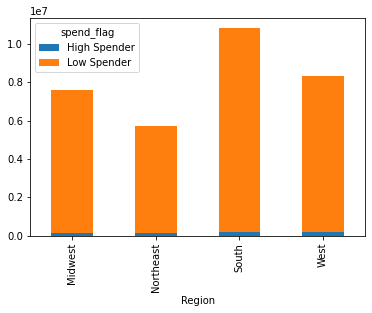

In [16]:
#plot high and low spenders count across region
stacked_bar_region_spenders = crosstab.plot.bar(stacked=True)

Across all orders, each region has around 50 low spender orders for every high spender order. Midwest (47.7), South (50.5), West (50.7), Northeast (51.9). Found in excel.

The Midwest has the most frequent high spend orders.(47.7)

The Northeast has the least frequent high spend orders (51.9), the least total high spend orders, and the least total overall orders.

The South region has the most total high spend orders (209824), the most overall orders (10801982), and the second lowest ratio of low to high spend orders (50.5).

## 4)
The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

### Identify and export sample of low order users

In [17]:
#max_order has highest order number. find user ids where this is less than 5
df_low_orders = df_cust_prod_ord[df_cust_prod_ord['max_order']< 5]

In [18]:
#export df_low_orders as excluded_data_of_less_than_5total_orders.pkl
df_low_orders.to_pickle(os.path.join(path,'2 Data', 'prepared data', 'excluded_data_of_less_than_5total_orders.pkl'))

### Flag users by activity and remove low users

In [19]:
#create flag for low activity customers
df_cust_prod_ord.loc[df_cust_prod_ord['max_order'] <5, 'user_activity'] = 'Low'

In [20]:
df_cust_prod_ord.loc[df_cust_prod_ord['max_order'] >=5, 'user_activity'] = 'High'

In [21]:
#exclude low activity customers from df_cust_prod_ord
df_cust_prod_ord = df_cust_prod_ord[df_cust_prod_ord['user_activity']=='High']

In [22]:
#check shape of df_cust_prod_ord
df_cust_prod_ord.shape

(30993489, 33)

In [23]:
#check shape of df_low_orders
df_low_orders.shape

(1441570, 32)

In [24]:
# subtract rows of df_low_orders from original df_cust_prod_ord to ensure it matches new total
32435059-1441570

30993489

## 5)
The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

Investigate the columns to look for ways to break them up into groups.

In [25]:
#relook at column headers
pd.set_option('display.max_columns', None)
df_cust_prod_ord.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range,busiest_day,busiest_2_days,busiest_period_of_day,max_order,loyalty_flag,avg_user_price,spend_flag,median_days_since_order,frequency_flag,Gender,STATE,Age,date_joined,num_of_dependants,fam_status,income,_merge,Region,user_activity
0,2539329.0,1.0,1.0,2.0,8.0,NaN,196,1.0,0.0,Soda,77.0,7.0,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,10.0,New Customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,both,South,High
1,2398795.0,1.0,2.0,3.0,7.0,15.0,196,1.0,1.0,Soda,77.0,7.0,9.0,Mid-range product,Regularly busy,Least busy,Average orders,10.0,New Customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,both,South,High
2,473747.0,1.0,3.0,3.0,12.0,21.0,196,1.0,1.0,Soda,77.0,7.0,9.0,Mid-range product,Regularly busy,Least busy,Most orders,10.0,New Customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,both,South,High
3,2254736.0,1.0,4.0,4.0,7.0,29.0,196,1.0,1.0,Soda,77.0,7.0,9.0,Mid-range product,Least busy,Least busy,Average orders,10.0,New Customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,both,South,High
4,431534.0,1.0,5.0,4.0,15.0,28.0,196,1.0,1.0,Soda,77.0,7.0,9.0,Mid-range product,Least busy,Least busy,Most orders,10.0,New Customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,both,South,High


In [26]:
# view department data for reference
df_dept

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [27]:
#find the descriptive stats values for age
df_cust_prod_ord['Age'].describe()

count    3.099349e+07
mean     4.946786e+01
std      1.848521e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: Age, dtype: float64

<AxesSubplot:ylabel='Frequency'>

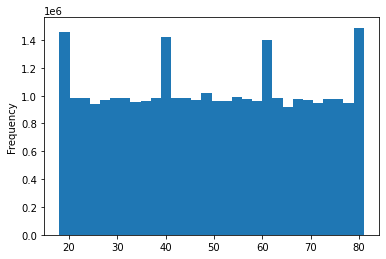

In [28]:
#view histogram for age
df_cust_prod_ord['Age'].plot.hist(bins = 30)

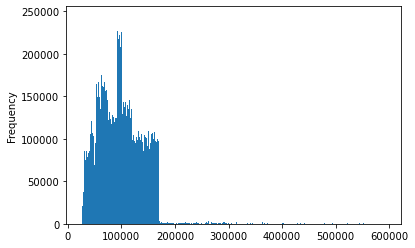

In [29]:
#view histogram for income
income_histo = df_cust_prod_ord['income'].plot.hist(bins = 1000)

In [30]:
#find the descritive stat values for income
df_cust_prod_ord['income'].describe()

count    3.099349e+07
mean     9.967349e+04
std      4.313999e+04
min      2.590300e+04
25%      6.728900e+04
50%      9.676500e+04
75%      1.281010e+05
max      5.939010e+05
Name: income, dtype: float64

variable flags for age, income, department_id, and number of dependants will be broken up by:

age -18 to 40, 40 to 60, 60 to 80

num_of_dependants is 0 for single shopper or not 0 for family shopper

department_id is perishable vs longer lasting foods: 
Perishable Food - 3(bakery), 4(produce), 12(meat seafood), 16 (dairy eggs), 20 (deli)
Long Lasting - 1(frozen), 9(dry goods pasta), 15(canned goods)

income will be low medium and high as 25-75, 75-125, over 125

### Age Variable

In [31]:
#following 3 lines will create age flags in new column age_group
df_cust_prod_ord.loc[df_cust_prod_ord['Age'] <=40, 'age_group'] = "Young"

In [32]:
df_cust_prod_ord.loc[(df_cust_prod_ord['Age'] >40) & (df_cust_prod_ord['Age'] <=60), 'age_group'] = "Middle Age"

In [33]:
df_cust_prod_ord.loc[df_cust_prod_ord['Age'] >60, 'age_group'] = "Older"

In [34]:
#check counts for age
df_cust_prod_ord['age_group'].value_counts(dropna=False)

Young         11158798
Older         10121834
Middle Age     9712857
Name: age_group, dtype: int64

### Number of Dependants Variable

In [35]:
#following 2 lines will define if order is for single shopper or family shopper in column shopper_fam_type
df_cust_prod_ord.loc[df_cust_prod_ord['num_of_dependants'] ==0, 'shopper_fam_type'] = "Single Shopper"

In [36]:
df_cust_prod_ord.loc[df_cust_prod_ord['num_of_dependants'] >0, 'shopper_fam_type'] = "Family Shopper"

In [37]:
#check counts for shopper type
df_cust_prod_ord['shopper_fam_type'].value_counts(dropna=False)

Family Shopper    23246306
Single Shopper     7747183
Name: shopper_fam_type, dtype: int64

### department_id Variable

In [38]:
#for loop will label depratment_id as perishable or long lasting
food_life = []

p=[3,4,12,16,20]
np=[1,9,15]

for value in df_cust_prod_ord['department_id']:
    if value in p:
        food_life.append('Perishable')
    elif value in np:
        food_life.append('Long Lasting')
    else:
        food_life.append('Not Defined')

In [39]:
#in new column food_shelf_life_type add results from ifood_life list
df_cust_prod_ord['food_shelf_life_type'] = food_life

In [40]:
#check counts for food_shelf_life_type
df_cust_prod_ord['food_shelf_life_type'].value_counts(dropna = False)

Perishable      17055902
Not Defined      9981645
Long Lasting     3955942
Name: food_shelf_life_type, dtype: int64

### Income Variable

In [41]:
#following 3 lines will set flags for low medium and high income as 25-75, 75-125, over 125

In [42]:
df_cust_prod_ord.loc[df_cust_prod_ord['income'] <= 75000, 'income_bracket'] = "25-75k"

In [43]:
df_cust_prod_ord.loc[(df_cust_prod_ord['income'] > 75000) & (df_cust_prod_ord['income'] <= 125000), 'income_bracket'] = "75-125k"

In [44]:
df_cust_prod_ord.loc[df_cust_prod_ord['income'] > 125000, 'income_bracket'] = "125k plus"

In [45]:
#check counts for income bracket
df_cust_prod_ord['income_bracket'].value_counts(dropna = False)

75-125k      12791346
25-75k        9916661
125k plus     8285482
Name: income_bracket, dtype: int64

## 6)
Create an appropriate visualization to show the distribution of profiles.

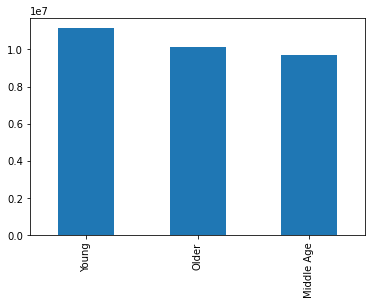

In [46]:
#create visualization for age group variable
age_bar = df_cust_prod_ord['age_group'].value_counts().plot.bar()

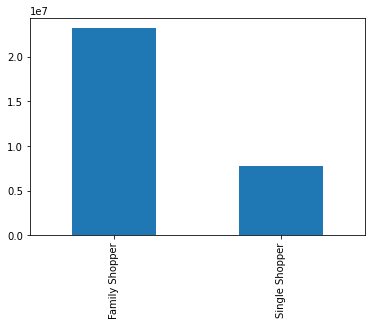

In [47]:
#create visualization for number of dependants variable
shopper_type_bar = df_cust_prod_ord['shopper_fam_type'].value_counts().plot.bar()

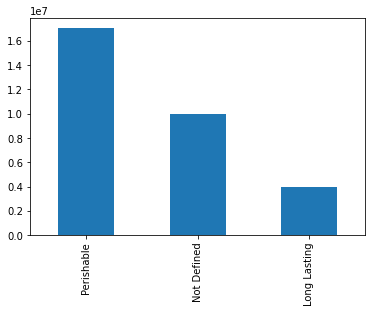

In [48]:
#create visualization for department id variable
food_shelf_life_bar = df_cust_prod_ord['food_shelf_life_type'].value_counts().plot.bar()

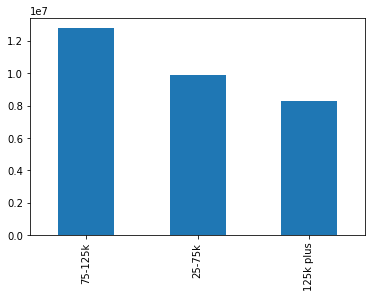

In [49]:
#create visualization for income variable
income_bar = df_cust_prod_ord['income_bracket'].value_counts().plot.bar()

## 7)
Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

### Age Variable

In [50]:
#group by age_group column and aggreagte  min, max, and mean for days_since_prior_order to get usage frequency
df_cust_prod_ord.groupby('age_group').agg({'days_since_prior_order':['min','max','mean']})

days_since_prior_order                 
                              min   max       mean
age_group                                         
Middle Age                    0.0  30.0  10.826170
Older                         0.0  30.0  10.792163
Young                         0.0  30.0  10.813125

In [51]:
df_cust_prod_ord.groupby('age_group').agg({'days_since_prior_order':['min','max','mean']})

days_since_prior_order                 
                              min   max       mean
age_group                                         
Middle Age                    0.0  30.0  10.826170
Older                         0.0  30.0  10.792163
Young                         0.0  30.0  10.813125

Average frequency of use very even among age groups

In [52]:
#group by age_group column and aggreagte  min, max, and mean for prices to get expenditure
df_cust_prod_ord.groupby('age_group').agg({'prices':['min','max','mean']})

prices                
              min   max      mean
age_group                        
Middle Age    1.0  25.0  7.790580
Older         1.0  25.0  7.796144
Young         1.0  25.0  7.785561

Average Prices for orders very even among age groups

### Number of Dependants Variable

In [53]:
#group by shopper_fam_type column and aggreagte  min, max, and mean for days_since_prior_order to get usage frequency
df_cust_prod_ord.groupby('shopper_fam_type').agg({'days_since_prior_order':['min','max','mean']})

days_since_prior_order                 
                                    min   max       mean
shopper_fam_type                                        
Family Shopper                      0.0  30.0  10.816574
Single Shopper                      0.0  30.0  10.791750

Average frequency of use very even for family and single shoppers

In [54]:
#group by shopper_fam_type column and aggreagte  min, max, and mean for prices to get expenditure
df_cust_prod_ord.groupby('shopper_fam_type').agg({'prices':['min','max','mean']})

prices                
                    min   max      mean
shopper_fam_type                       
Family Shopper      1.0  25.0  7.790937
Single Shopper      1.0  25.0  7.789550

Average Prices for orders very even for family and single shoppers

### department_id Variable

In [55]:
#group by food_shelf_life_type column and aggreagte  min, max, and mean for days_since_prior_order to get usage frequency
df_cust_prod_ord.groupby('food_shelf_life_type').agg({'days_since_prior_order':['min','max','mean']})

days_since_prior_order                 
                                        min   max       mean
food_shelf_life_type                                        
Long Lasting                            0.0  30.0  11.394526
Not Defined                             0.0  30.0  10.802808
Perishable                              0.0  30.0  10.680165

Average frequency of orders for long lasting food a half of a day less frequent than perishable or non defined departments. 
Longer is expected but a larger gap would also be expected. 

In [56]:
df_cust_prod_ord.groupby('food_shelf_life_type').agg({'days_since_prior_order':['mean']})

,days_since_prior_order
,mean
food_shelf_life_type,
Long Lasting,11.394526
Not Defined,10.802808
Perishable,10.680165


In [57]:
#group by food_shelf_life_type column and aggreagte  min, max, and mean for prices to get expenditure
df_cust_prod_ord.groupby('food_shelf_life_type').agg({'prices':['min','max','mean']})

prices                
                        min   max      mean
food_shelf_life_type                       
Long Lasting            1.0  15.0  7.605988
Not Defined             1.0  20.0  6.823492
Perishable              1.0  25.0  8.397917

Perishable food looks to be the most expensive group of departments items. 

### Income Variable

In [58]:
#group by income_bracket column and aggreagte  min, max, and mean for days_since_prior_order to get usage frequency
df_cust_prod_ord.groupby('income_bracket').agg({'days_since_prior_order':['min','max','mean']})

days_since_prior_order                 
                                  min   max       mean
income_bracket                                        
125k plus                         0.0  30.0  10.755078
25-75k                            0.0  30.0  10.901005
75-125k                           0.0  30.0  10.776023

The lowest income group orders the least frequently. 

In [59]:
#group by income_bracket column and aggreagte  min, max, and mean for prices to get expenditure
df_cust_prod_ord.groupby('income_bracket').agg({'prices':['min','max','mean']})

prices                
                  min   max      mean
income_bracket                       
125k plus         1.0  25.0  7.951193
25-75k            1.0  25.0  7.442175
75-125k           1.0  25.0  7.956709

The lowest income group orders the least expensive items.

## 8)
Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

AND 
## 9)
Produce suitable charts to illustrate your results and export them in your project folder.

### Age Variable

In [60]:
#create crosstab between age_group and Region
crosstab_age_region = pd.crosstab(df_cust_prod_ord['age_group'],df_cust_prod_ord['Region'], dropna=False)

In [61]:
#view crosstab_age_region in excel
crosstab_age_region.to_clipboard()

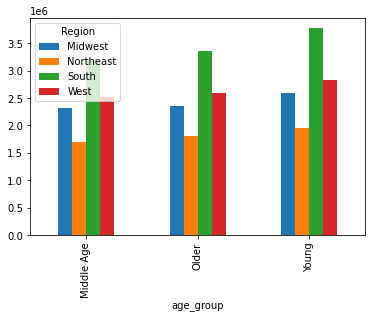

In [62]:
#bar chart of age_group and Region
bar_age_region = crosstab_age_region.plot.bar()

All regions have Young as the largest category as expected. All regions have Young as 36% of pop. The South is the only with Young as 37%.

The Midwest and West have fairly equal Middle Age and Older poputations with around a 300k jump in Young

The Northeast and South have larger Older than Middle Age populations.

In [63]:
#create crosstab between age_group and department_id
crosstab_age_dept = pd.crosstab(df_cust_prod_ord['department_id'],df_cust_prod_ord['age_group'], dropna=False)

In [64]:
#view crosstab_age_dept in excel
crosstab_age_dept.to_clipboard()

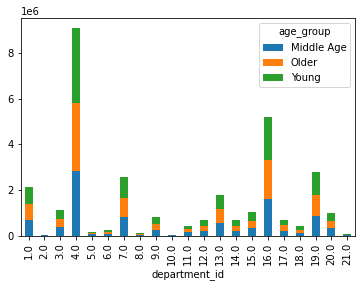

In [65]:
#bar graph of age by department
stacked_bar_age_dept = crosstab_age_dept.plot.bar(stacked=True)

The size of the group predicts the amount of orders from each department. Most to Young, 2nd to Older, and 3rd to Middle Age.

### Number of Dependants Variable

In [66]:
#create crosstab between shopper_fam_type and Region
crosstab_shopper_type_region = pd.crosstab(df_cust_prod_ord['shopper_fam_type'],df_cust_prod_ord['Region'], dropna=False)

In [67]:
#view crosstab_shopper_type_region in excel
crosstab_shopper_type_region.to_clipboard()

There are about 3 times as many Family Shoppers to Single Shoppers overall. This is right at 3 in the NE and WE. There is a slight lean toward family in MW and SO at 2.9.

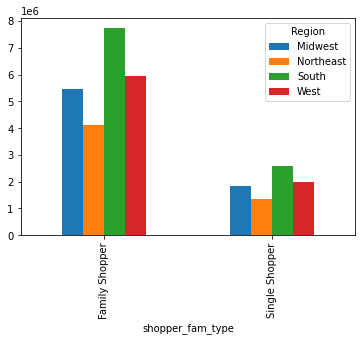

In [68]:
#plot shopper family type by region
fam_type_region_bar = crosstab_shopper_type_region.plot.bar()

In [69]:
#create crosstab between shopper_fam_type and department
crosstab_shopper_type_dept = pd.crosstab(df_cust_prod_ord['department_id'],df_cust_prod_ord['shopper_fam_type'], dropna= False)

In [70]:
#view crosstab_shopper_type_dept in excel
crosstab_shopper_type_dept.to_clipboard()

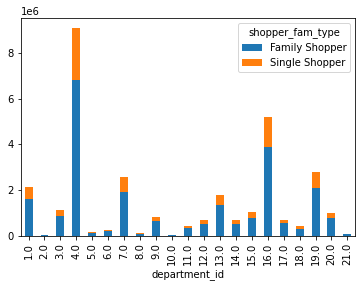

In [71]:
#plot family shopper type by department
stacked_bar_fam_type_dept = crosstab_shopper_type_dept.plot.bar(stacked=True)

Largest pro family department at 3.18 family/single is 10[bulk]. Next largest are 17[household](3.08), 12[meat seafood](3.07), and 21[missing](3.06)

Largest pro single department at 2.9 family/single is 5[alcohol]. Next largest are 2[other](2.95), and 8[pets](2.94)

People with dependants are more likely to buy bulk, household items, and meat/seafood.
People without depenedants are more likely to buy alcohol and pet items.

Interestingly enough, department id 18 (babies) is a slight single shopper lean at 2.97.

### department_id Variable

In [72]:
#create crosstab between food_shelf_life_type and Region
crosstab_shelf_region = pd.crosstab(df_cust_prod_ord['food_shelf_life_type'],df_cust_prod_ord['Region'], dropna = False)

In [73]:
#view crosstab_shelf_region in excel
crosstab_shelf_region.to_clipboard()

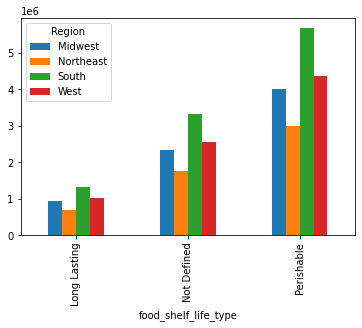

In [74]:
#plot bar chart of food_shelf_life_type and Region
food_shelf_life_region_bar = crosstab_shelf_region.plot.bar()

Percentage of food shelf life type stays totally consistent across regions

In [75]:
#create crosstab between food_shelf_life_type and department_id
crosstab_shelf_dept = pd.crosstab(df_cust_prod_ord['food_shelf_life_type'],df_cust_prod_ord['department_id'], dropna = False)

In [76]:
#view crosstab_shelf_dept in excel
crosstab_shelf_dept.to_clipboard()

Departments only have 1 category filled in per type. Which makes sense and was a good data check.

### Income Variable

In [77]:
#create crosstab between income_bracket and Region
crosstab_income_region = pd.crosstab(df_cust_prod_ord['income_bracket'],df_cust_prod_ord['Region'], dropna = False)

In [78]:
#view crosstab_shelf_region in excel
crosstab_income_region.to_clipboard()

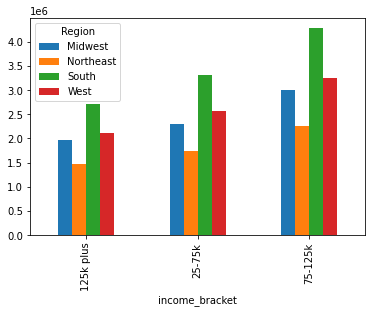

In [79]:
#plot bar chart of income_bracket and Region
income_bracket_region_bar = crosstab_income_region.plot.bar()

Percentage of income brackets stays consistent across regions

In [80]:
#create crosstab between income_bracket and department_id
crosstab_income_dept = pd.crosstab(df_cust_prod_ord['department_id'],df_cust_prod_ord['income_bracket'], dropna = False)

In [81]:
#view crosstab_income_dept in excel
crosstab_income_dept.to_clipboard()

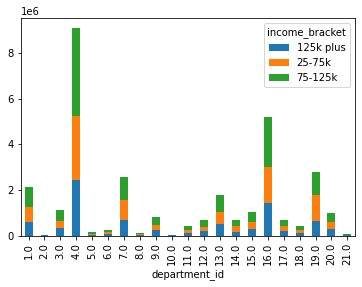

In [82]:
#plot income_bracket by department
stacked_bar_income_bracket_dept = crosstab_income_dept.plot.bar(stacked = True)

The overall percentage breakdown is 125k plus buys the least amount(27%), 25-75k buys the second most (32%), and 75-125k buys the most (41%).

There are a lot of departments that cause interesting changes in those normal amounts.

5(alcohol) where 125k is the only riser to 30%.

7(beverages) where 25-75k is the only riser to 35%.

10(bulk) where 125k drops to 24%, 25-75k rise to 36%, and 75-125k stays fairly even at 40%.

12(meat seafood) where 125k rises to 29%, 25-75k drops to 26%, and 75-125k rises to their highest of 45%.

14(breakfast) 25-75k is the only riser to 35%.

15(canned goods) where 75-125k is the only riser to 43%

8(babies) where 75-125k is the only riser to 44% and both other categories have 28%.

19(snacks) where 25-75k is the only riser to 41%.


Putting these together:

Low income (25-75k) has larger than normal share in beverages, bulk, breakfast, and snacks. This group does not purchase as much meat/seafood, dry goods, canned goods, and baby supplies.

Medium income (75-125k) buys more meast/seafood, baby supplies, and canned goods. This group does not purchase snacks.

High income (over 125k) buys alcohol but they do not buy bulk or snacks.

## 10)
Anaysis of departments and loyalty

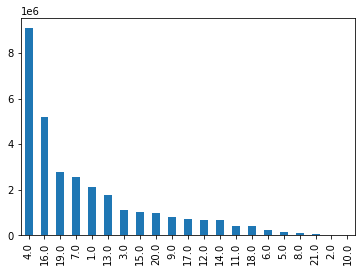

In [83]:
#show bar graph of frequncey of orders across all departments
bar_department_order_frequency = df_cust_prod_ord['department_id'].value_counts().plot.bar()

In [84]:
#compare loyalty to the spend_flag
loyalty_spend_crosstab = pd.crosstab(df_cust_prod_ord['loyalty_flag'],df_cust_prod_ord['spend_flag'],dropna=False)
loyalty_spend_crosstab

spend_flag,High Spender,Low Spender
loyalty_flag,,
Loyal customer,216809,10077218
New Customer,84022,4723933
Regular customer,302944,15588563


<AxesSubplot:xlabel='loyalty_flag'>

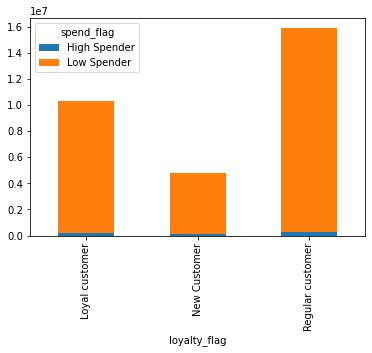

In [85]:
loyalty_spend_crosstab.plot.bar(stacked=True)

In [86]:
#compare loyalty to the frequency_flag
loyalty_frequency_crosstab = pd.crosstab(df_cust_prod_ord['loyalty_flag'],df_cust_prod_ord['frequency_flag'],dropna=False)
loyalty_frequency_crosstab

frequency_flag,Frequent customer,Non-frequent customer,Regular customer
loyalty_flag,,,
Loyal customer,10289894,0,4133
New Customer,1294298,1985104,1528553
Regular customer,9638452,912366,5340689


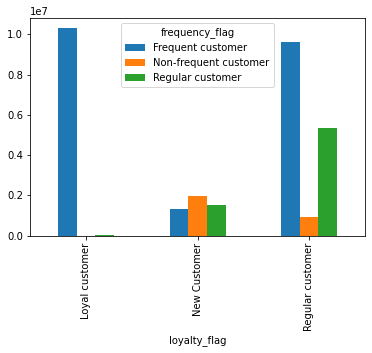

In [87]:
loyalty_frequency_bar = loyalty_frequency_crosstab.plot.bar()

## 11)
Export visualizations and dataframe

In [88]:
#export data frame
df_cust_prod_ord.to_pickle(os.path.join(path, '2 Data','prepared data', 'post_4_10_task_final_orders_products_customers.pkl'))

In [89]:
#export visualizations
stacked_bar_region_spenders.figure.savefig(os.path.join(path, '4 Analysis', 'Visualizations', 'stacked_bar_region_spenders.dow.png'))

In [90]:
age_bar.figure.savefig(os.path.join(path, '4 Analysis', 'Visualizations', 'age_distribution_bar.dow.png'))

In [91]:
shopper_type_bar.figure.savefig(os.path.join(path, '4 Analysis', 'Visualizations', 'shopper_type_distribution_bar.dow.png'))

In [92]:
food_shelf_life_bar.figure.savefig(os.path.join(path, '4 Analysis', 'Visualizations', 'food_shelf_life_distribution_bar.dow.png'))

In [93]:
income_bar.figure.savefig(os.path.join(path, '4 Analysis', 'Visualizations', 'income_distribution_bar.dow.png'))

In [94]:
bar_age_region.figure.savefig(os.path.join(path, '4 Analysis', 'Visualizations', 'age_region_bar.dow.png'))

In [95]:
stacked_bar_age_dept.figure.savefig(os.path.join(path, '4 Analysis', 'Visualizations', 'age_dept_stacked_bar.dow.png'))

In [96]:
fam_type_region_bar.figure.savefig(os.path.join(path, '4 Analysis', 'Visualizations', 'fam_type_region_bar.dow.png'))

In [97]:
stacked_bar_fam_type_dept.figure.savefig(os.path.join(path, '4 Analysis', 'Visualizations', 'stacked_bar_fam_type_dept.dow.png'))

In [98]:
food_shelf_life_region_bar.figure.savefig(os.path.join(path, '4 Analysis', 'Visualizations', 'food_shelp_life_region_bar.dow.png'))

In [99]:
income_bracket_region_bar.figure.savefig(os.path.join(path, '4 Analysis', 'Visualizations', 'income_bracket_region_bar.dow.png'))

In [100]:
stacked_bar_income_bracket_dept.figure.savefig(os.path.join(path, '4 Analysis', 'Visualizations', 'stacked_bar_income_bracket_dept.dow.png'))

In [101]:
bar_department_order_frequency.figure.savefig(os.path.join(path, '4 Analysis', 'Visualizations', 'bar_department_order_frequency.png'))

In [102]:
loyalty_frequency_bar.figure.savefig(os.path.join(path, '4 Analysis', 'Visualizations', 'loyalty_frequency_bar.png'))

In [103]:
income_histo.figure.savefig(os.path.join(path, '4 Analysis', 'Visualizations', 'income_histo.png'))